<a href='https://aims-senegal.org/'> <img src='http://sn.nexteinstein.org/wp-content/uploads/sites/12/2016/07/aims_senegal.jpg' /></a>

# **Finance Data Analysis**

In this notebook we will focus on exploratory data analysis of stock prices. 

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to use pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)





---



## The Imports

Already filled out for you.

In [ ]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects: use datatime.date(year, month, day).
2. Figure out the ticker symbol for each bank (GOOGLE IT XD) 
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK, "yahoo" seems to work fine. 
------------


In [ ]:
start = datetime.date(2006,1,1)
end = datetime.date(2016,1,1)

In [ ]:
BAC = data.DataReader("BAC",'yahoo',start,end)
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.596096
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.228691
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.272778
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.221321
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.243366


In [ ]:
WF = data.DataReader("WF",'yahoo',start,end)
MS = data.DataReader("MS",'yahoo',start,end)
JPM = data.DataReader("JPM",'yahoo',start,end)
GS = data.DataReader("GS",'yahoo',start,end)
C = data.DataReader("C",'yahoo',start,end)

In [ ]:
WF.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,73.766388,72.228844,72.705605,72.884384,23408.0,72.381088
2006-01-04,74.719902,72.884384,73.122765,74.016685,27268.0,73.505569
2006-01-05,73.420738,72.526817,73.003578,72.669846,11075.0,72.168030
2006-01-06,76.769966,73.897499,73.897499,75.744934,34819.0,75.221886
2006-01-09,75.268173,74.195473,74.493446,74.195473,30959.0,73.683121


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [ ]:
Tickers =["BAC","C","GS","JPM","MS","WF"]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

check the docs for pd.concat

In [ ]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WF],axis=1 ,keys=["BAC","C","GS","JPM","MS","WF"])

**Set the column name levels (this is filled out for you):**

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [ ]:
# your code should be here
bank_stocks.head()

Bank Ticker        BAC                        ...         WF                    
Stock Info        High        Low       Open  ...      Close   Volume  Adj Close
Date                                          ...                               
2006-01-03   47.180000  46.150002  46.919998  ...  72.884384  23408.0  72.381088
2006-01-04   47.240002  46.450001  47.000000  ...  74.016685  27268.0  73.505569
2006-01-05   46.830002  46.320000  46.580002  ...  72.669846  11075.0  72.168030
2006-01-06   46.910000  46.349998  46.799999  ...  75.744934  34819.0  75.221886
2006-01-09   46.970001  46.360001  46.720001  ...  74.195473  30959.0  73.683121

[5 rows x 36 columns]

In [ ]:
#expected answer, Don't run this cell

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this analysis.

**What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
#your code should be here
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

In [ ]:
#expected answer, Don't run this cell

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
# use this cell to create an empty data frame called returns
returns = pd.DataFrame()


**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [ ]:
#your code should be here
for i in Tickers:
     returns[i +' Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.020456


In [ ]:



#returns=bank_stocks.xs(level=1 ,key='Close',axis=1).pct_change()
#returns.columns=['BAC Return','C Return','GS Return','JPM Return','MS Return','WF Return']
#returns.head()

In [ ]:
#expected answer, Don't run this cell

**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

please refer to [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for creating pairplot using seaborn 

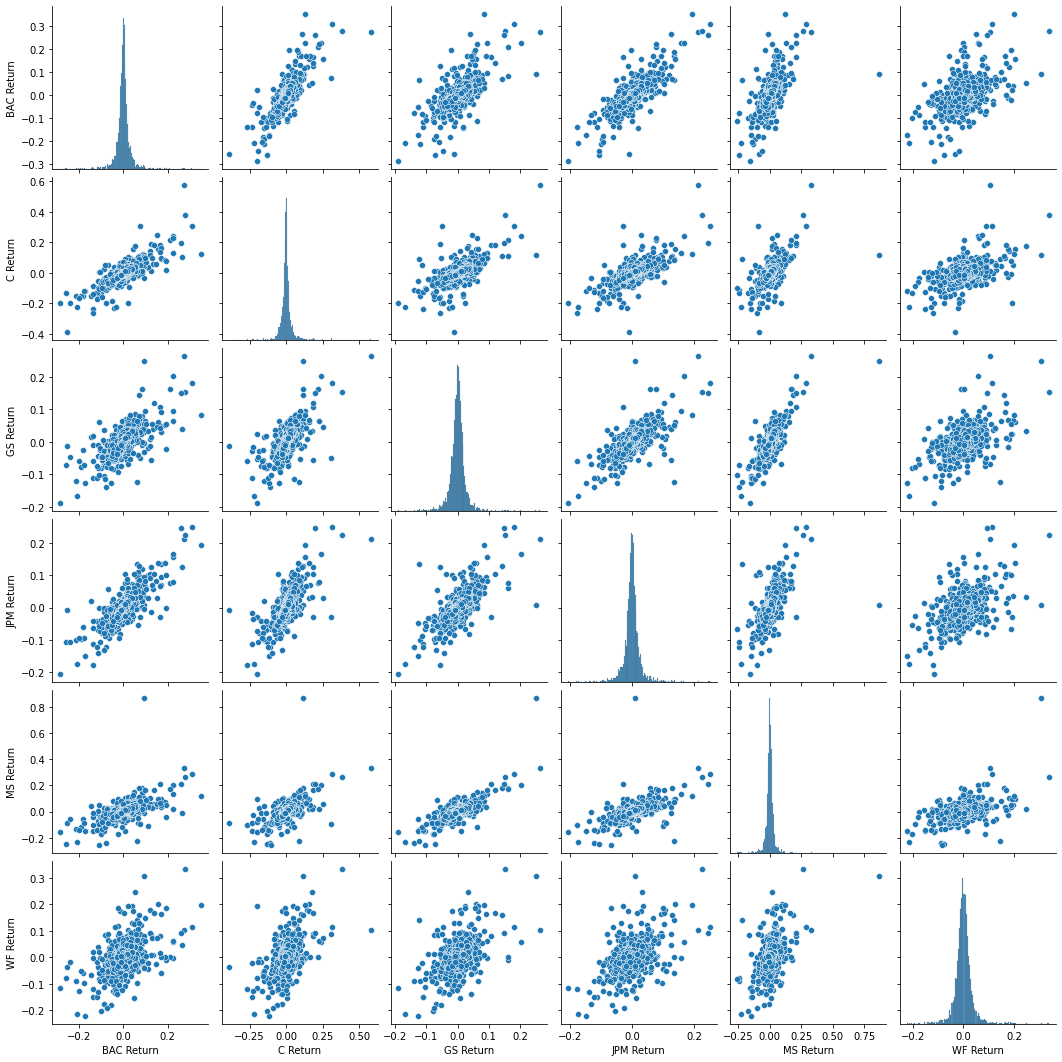

In [ ]:
#your code should be here
sns.pairplot(returns)

In [ ]:
#expected answer, Don't run this cell



---



**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [ ]:
returns.idxmax()
# your code should be here


BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2009-03-10
dtype: datetime64[ns]

In [ ]:
#expected answer, Don't run this cell

In [ ]:
# your code should be here
returns.idxmin()


BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]

In [ ]:
#expected answer, Don't run this cell

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another**



---



---



---



**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [ ]:
# your code should be here
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WF Return     0.035348
dtype: float64

In [ ]:
#expected answer, Don't run this cell

In [ ]:
# your code should be here
returns.reset_index()[returns.reset_index()['Date'].apply(lambda x: x.year == 2015)].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WF Return     0.022002
dtype: float64

In [ ]:
#expected answer, Don't run this cell

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

Look at the documentation: [distplot using seaborn](https://seaborn.pydata.org/generated/seaborn.distplot.html)

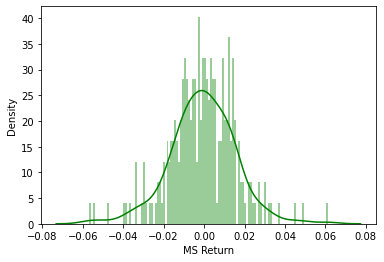

In [ ]:
# your code should be here
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=120)

In [ ]:
#expected answer, Don't run this cell

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

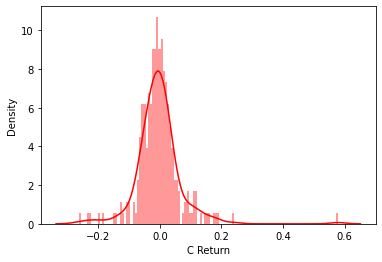

In [ ]:
# your code should be here
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=120)

In [ ]:
#expected answer, Don't run this cell

____
# More Visualization:

**A lot of this analysis will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas**

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

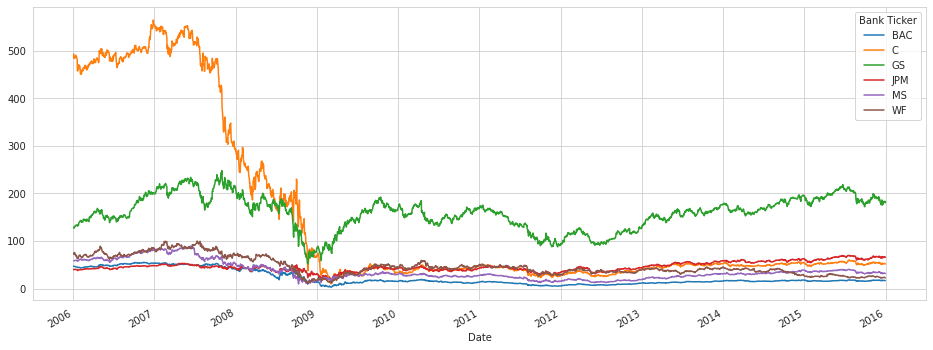

In [ ]:
# your code should be here
bank_stocks.xs('Close', level='Stock Info', axis = 1).plot(figsize=(16,6),label=Tickers)

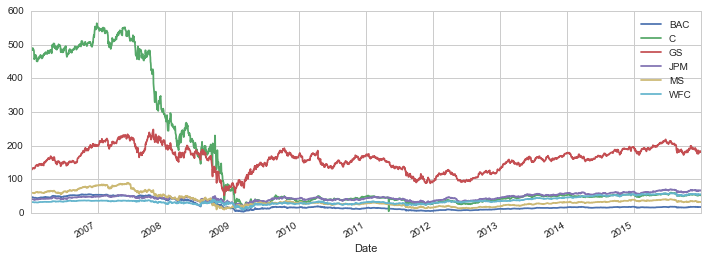

In [ ]:
#expected answer, Don't run this cell
a

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008** 



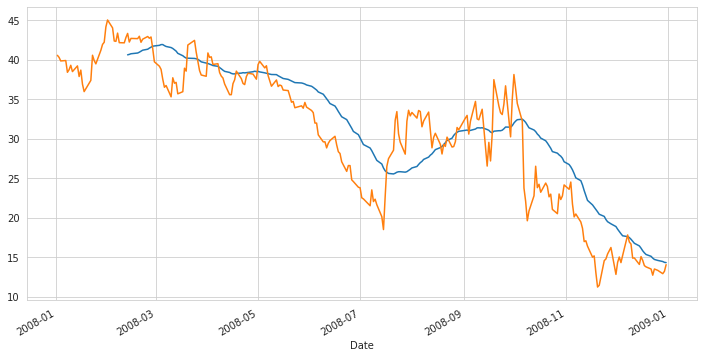

In [ ]:
# your code should be here
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot()
BAC['Close']['2008-01-01':'2009-01-01'].plot()


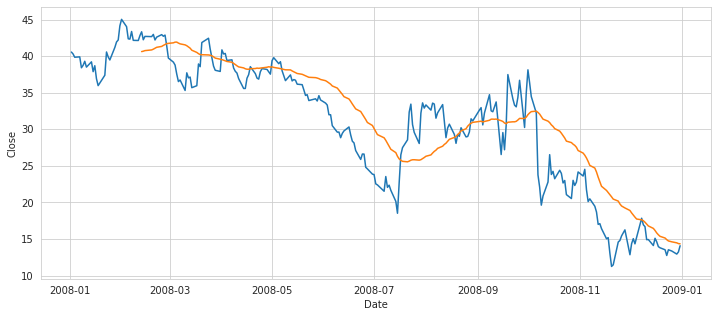

In [ ]:
#expected answer, Don't run this cell

**Create a heatmap of the correlation between the stocks Close Price: BONUS**

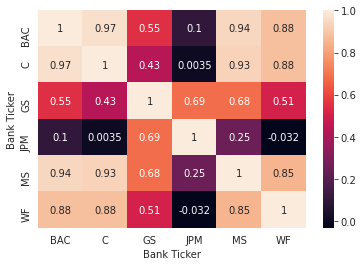

In [ ]:
# your code should be here
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

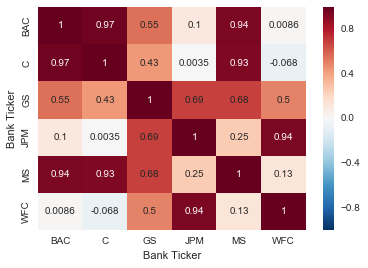

In [ ]:
#expected answer, Don't run this cell

**Optional: Use seaborn's clustermap to cluster the correlations together:**

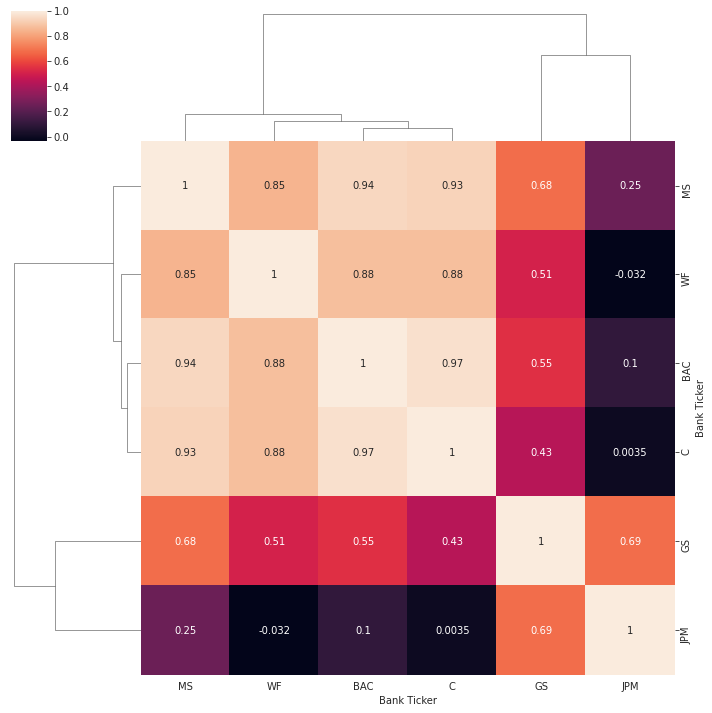

In [ ]:
# your code should be here
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

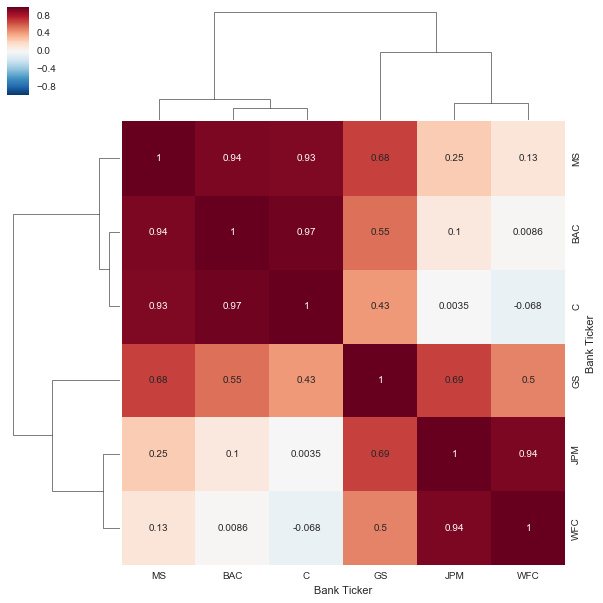

In [ ]:
#expected answer, Don't run this cell

# GREAT JOB

---



---



---



---

